# Smoothness of Hoofddoekjes
An interesting problem is to classify the smoothness of 3D surfaces based only on 2D images of them.
One source of motivation is art history, in which the smoothness of the clothes of a subject is often of interest, since it provides information about their wealth, culture, etc.
Here, we classify the smoothness of Dutch headdresses painted by Vermeer using a lower star filtration.

In [8]:
from skimage import io, data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import PIL
from persim import plot_diagrams
from ripser import ripser, lower_star_img
from gtda.diagrams import PersistenceEntropy
from gtda.plotting import plot_point_cloud

(847, 2)


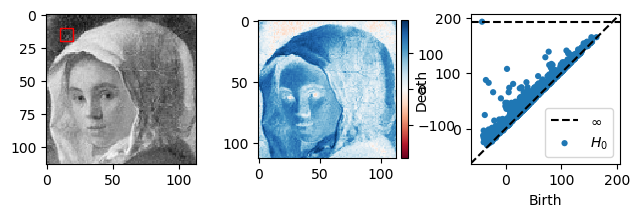

Entropy:  6.284733273823335
(1006, 2)


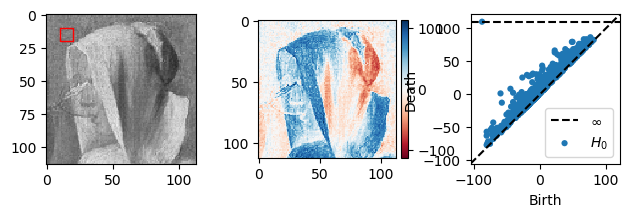

Entropy:  6.581115381892457
(725, 2)


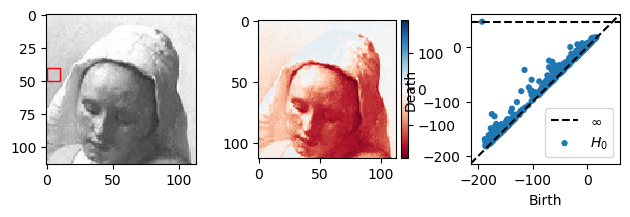

Entropy:  6.118369652746893
(755, 2)


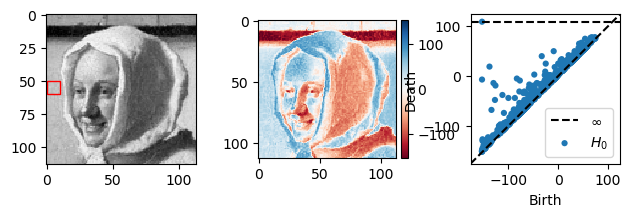

Entropy:  6.015509755037957
(472, 2)


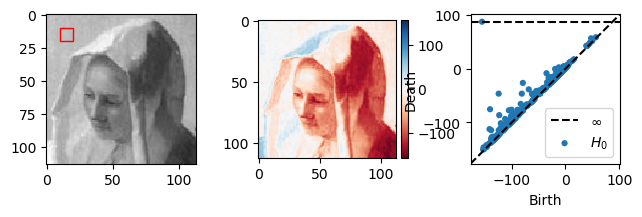

Entropy:  5.634659019673932
(534, 2)


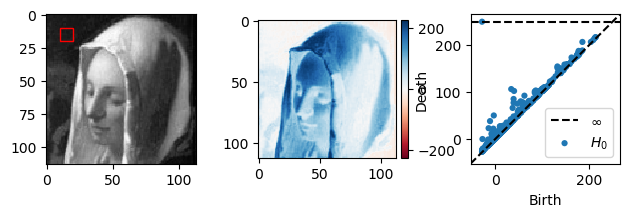

Entropy:  5.733997019423526


In [6]:
imgcol = io.imread_collection('Images/*.jpg')
#plt.figure(1)
dgmcol = []
Es = []

means = [[10,10],[10,10],[0,40],[0,50],[10,10],[10,10],[0,50],[10,10],[10,10],[10,10]]

for i in range(len(imgcol)):
    img = imgcol[i]
    plt.figure()
    #To Grayscale
    img = np.asarray(PIL.Image.fromarray(img).convert('L'))
    ax = plt.subplot(131)
    io.imshow(img)
    #Subtract mean
    #ax.plot(*means[i], '.r')
    ax.add_patch(Rectangle(means[i], 10, 10, fill=False, color='red'))
    img = img - np.mean(img[means[i][0]:means[i][0]+10,means[i][1]:means[i][1]+10])
    
    dgm = lower_star_img(img)
    dgmcol.append(dgm)
    #Show diagram
    plt.subplot(132)
    io.imshow(img)
    #im = plt.show()
    plt.subplot(133)
    plot_diagrams(dgm)
    print(dgm.shape)
    plt.show()
    
    #Compute entropy
    l = [b[1]-b[0] for b in dgm if b[1]<=1e10 and b[0]<=1e10]
    
    L = sum(l)
    p = l/L
    E = sum(-p*np.log(p))
    print("Entropy: ", E)
    Es.append(E)


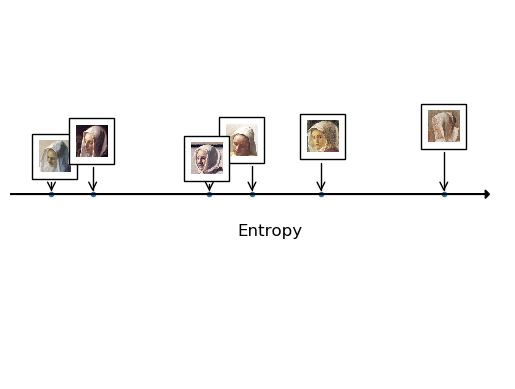

In [15]:
fig, ax = plt.subplots()
ax.axis('off')

left = min(Es)-0.1
right = max(Es)+0.15
#ax.scatter(max(Es)+0.3, 0, marker=".")
plt.xlim(left,max(Es)+0.15)
Es = np.array(Es)

ax.scatter(Es, np.zeros(len(Es)), marker='.')
ax.arrow(left,0,right-left-0.05,0, width=0.00001, head_length=0.01, head_width=0.0002, color='black')
ax.text((right+left)/2-0.05, -0.001, 'Entropy', fontsize=12)

xs = 20*np.random.rand(len(imgcol))-10
ys = 30*np.random.rand(len(imgcol))+20

for i in range(len(imgcol)):
    imagebox = OffsetImage(imgcol[i], zoom=0.2)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, [Es[i],0],
                        xybox=(xs[i], ys[i]),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        arrowprops=dict(
                            arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )
    ax.add_artist(ab)

plt.show()